<a href="https://colab.research.google.com/github/vkgithub1556/AirbnbProject/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import scipy.stats as stat

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
age_gen_df = pd.read_csv("/content/drive/My Drive/Data/airbnb/age_gender_bkts.csv")
age_gen_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [ ]:
age_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


FInding average of each age group and adding as another column

In [ ]:
age_gen_df['age_bucket']=age_gen_df['age_bucket'].apply(lambda x: '100-104' if x == '100+' else x)
age_gen_df['mean_age']=age_gen_df['age_bucket'].apply(lambda x: (int(x.split('-')[0])+int(x.split('-')[1]))/2)

In [ ]:
age_gen_df=age_gen_df.drop({'age_bucket','year'},axis=1)

In [ ]:
age_gen_df

,country_destination,gender,population_in_thousands,mean_age
0,AU,male,1.0,102.0
1,AU,male,9.0,97.0
2,AU,male,47.0,92.0
3,AU,male,118.0,87.0
4,AU,male,199.0,82.0
...,...,...,...,...
415,US,male,115.0,97.0
416,US,male,541.0,92.0
417,US,female,10570.0,17.0
418,US,male,1441.0,87.0


List of all destination countries and their counts

In [ ]:
list(age_gen_df['country_destination'].unique())
age_gen_df['country_destination'].value_counts()

PT    42
FR    42
DE    42
ES    42
GB    42
US    42
CA    42
IT    42
AU    42
NL    42
Name: country_destination, dtype: int64

In [ ]:
age_gen_df['gender'].value_counts()

female    210
male      210
Name: gender, dtype: int64

making gender values as gategorical values replacinf male with 0 and female with 1

In [ ]:
age_gen_df['gender']=age_gen_df['gender'].apply(lambda x:0 if x =='male' else 1)
age_gen_df['gender'].value_counts()

1    210
0    210
Name: gender, dtype: int64

Reading countries data

In [ ]:
countries = pd.read_csv("/content/drive/My Drive/Data/airbnb/countries.csv")

In [ ]:
countries.head(20)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


Reading sessions data

In [ ]:
sessions=pd.read_csv('/content/drive/My Drive/Data/airbnb/sessions.csv')

In [ ]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
sessions.shape

(203682, 6)

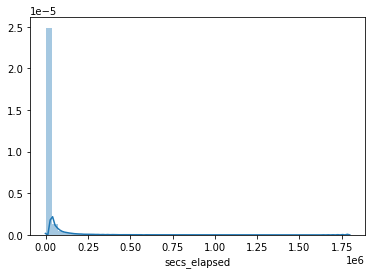

In [ ]:
sns.distplot(sessions[sessions['secs_elapsed'].notnull()]['secs_elapsed'])

In [ ]:
sessions['secs_elapsed'].describe()

count    2.005990e+05
mean     2.149337e+04
std      9.268329e+04
min      0.000000e+00
25%      4.090000e+02
50%      1.384000e+03
75%      9.653000e+03
max      1.796329e+06
Name: secs_elapsed, dtype: float64

In [ ]:
len(sessions[sessions['secs_elapsed'].isnull()])

3083

In [ ]:
median_session=sessions['secs_elapsed'].median()

In [ ]:
sessions['secs_elapsed']=sessions['secs_elapsed'].fillna(median_session)

In [ ]:
sessions['secs_elapsed'].describe()

count    2.036820e+05
mean     2.118899e+04
std      9.201193e+04
min      0.000000e+00
25%      4.210000e+02
50%      1.384000e+03
75%      9.324750e+03
max      1.796329e+06
Name: secs_elapsed, dtype: float64

As can be seen above, the interpolation has not significantly altered the summary statistics of the distribution. This is a good option for filling in the null values for the time being.



Let us check sessions which donot have any actions

In [ ]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
no_action=sessions[(sessions['action'].isnull())|(sessions['action_detail'].isnull())|(sessions['action_type'].isnull())]

In [ ]:
no_action.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [ ]:
no_action.shape

(36955, 6)

Device types used to access irbnb

In [ ]:
sessions['device_type'].value_counts()

Mac Desktop                         90307
Windows Desktop                     55644
iPad Tablet                         20589
Android App Unknown Phone/Tablet    17538
iPhone                              12617
-unknown-                            4003
Chromebook                            940
Tablet                                812
Linux Desktop                         504
iPodtouch                             452
Android Phone                         268
Blackberry                              4
Windows Phone                           3
Name: device_type, dtype: int64

activities without any device information

In [ ]:
len(sessions[sessions['device_type'].isnull()])

1

These are no sessions from unknown devices

**let us now analyse training users data for which we have to prediction their first destination**

In [ ]:
train_users=pd.read_csv("/content/drive/My Drive/Data/airbnb/train_users_2.csv")
train_users.head()


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


replacing unknown values in gender and first browser 

In [ ]:
train_users['gender']=train_users['gender'].replace('-unknown-',np.nan)
train_users['first_browser']=train_users['first_browser'].replace('-unknown-',np.nan)

In [ ]:
train_users.gender.astype(str)

0            nan
1           MALE
2         FEMALE
3         FEMALE
4            nan
           ...  
134892       nan
134893      MALE
134894      MALE
134895      MALE
134896      -unk
Name: gender, Length: 134897, dtype: object

In [ ]:
train_users[train_users['age']>120]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
388,v2x0ms9c62,2010-04-11,20100411065602,2010-04-13,NaN,2014.0,basic,3.0,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
673,umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,2014.0,basic,2.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
1040,m82epwn7i8,2010-07-14,20100714230556,2010-07-15,MALE,2014.0,facebook,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,US
1177,2th813zdx7,2010-07-25,20100725234419,2010-07-26,MALE,2013.0,facebook,3.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
1200,3amf04n3o3,2010-07-27,20100727190447,2010-07-29,FEMALE,2014.0,basic,2.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132980,w8ncrzq6v9,2013-12-16,20131216225447,2013-12-17,FEMALE,2014.0,basic,0.0,en,direct,direct,linked,Web,Mac Desktop,Safari,US
133485,fbywcx4pjb,2013-12-18,20131218155407,NaN,MALE,2014.0,facebook,0.0,ru,direct,direct,untracked,Web,Windows Desktop,Opera,NDF
134485,g4669dnrj6,2013-12-22,20131222080833,2013-12-22,NaN,2014.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Safari,US
134492,pzyroogarh,2013-12-22,20131222094337,NaN,FEMALE,2014.0,basic,0.0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF


We can see there are age values much greater than 104. these wrong age values will affect the analysis so let us replace these values with NAN

In [ ]:
train_users['age']=train_users['age'].apply(lambda x:np.nan if x>120 else x)

In [ ]:
train_users[train_users['age']>115]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


Finding all the columns which have null values

In [ ]:
train_users.isna().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                      True
age                         True
signup_method               True
signup_flow                 True
language                    True
affiliate_channel           True
affiliate_provider          True
first_affiliate_tracked     True
signup_app                  True
first_device_type           True
first_browser               True
country_destination         True
dtype: bool

Changing data type of date

In [ ]:
df_accounts=train_users.groupby('date_account_created')['id'].count().reset_index()
df_accounts['date_account_created'] = df_accounts['date_account_created'].astype('datetime64[ns]') 

Number of new accounts created each year

In [ ]:
df_accounts['date_account_created'].dt.year.value_counts()


2012    366
2011    365
2013    359
2010    357
2014     32
Name: date_account_created, dtype: int64

***STATISTICAL ANALYSIS ON THE DATA***

First check: Let us check if there is any relationship between gender and country which means does the gender of a person affect the first country he/she books an airbnb? 
Since the number of destination countries is multivariable we use Chi Square  Significance Test.

*Chi Square Significance Test:*<br> It is used to compare two set of data and see if there is any relationship between them. It give 'p' value which helps us to decide.

A Detailed explanation on Chi Square Significance Test is explained clearly in below links:  
https://math.hws.edu/javamath/ryan/ChiSquare.html <br>
https://www.mathsisfun.com/data/chi-square-test.html 

STEP 1: State hypotheses  
STEP 2: 


From Above we can these that there are null values in gender data so we have to remove those rows which have null value as gender.  
Also we will remove  those users who has never booked an airbnb or booked in a country whose details are unknown

In [ ]:
train_users['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU', nan], dtype=object)

There are two values 'NDF' and 'other' which are not required for our analysis


Now we can see there are no null values in gender and country destination columns. 
Lets make it as another dataframe

In [ ]:
df_chi = train_users[(train_users['country_destination']!='NDF')  &  (train_users['country_destination']!='other')  &  (train_users['gender']!='OTHER')  &  
            (train_users['gender'].notnull())]


In [ ]:
df_chi=df_chi[['id','gender','country_destination']]
df_chi.head()

,id,gender,country_destination
2,4ft3gnwmtx,FEMALE,US
6,lsw9q7uk0j,FEMALE,US
7,0d01nltbrs,FEMALE,US
8,a1vcnhxeij,FEMALE,US
10,yuuqmid2rp,FEMALE,US


In [ ]:
df_chi['gender'].value_counts()

FEMALE    19770
MALE      16479
-unk          1
Name: gender, dtype: int64

Let us define our Hypothesese as below:  
Null Hypothesis: There is no relationship between gender and destination country  
Alternate Hypothesis: There is relationship between gender and destination country

Let us assume our significant level α = 0.05

ALso let us make a contingency table with these categorical (gender) and numerical data (count total countries visited by male and female). This can be achieved by using pivot table

In [ ]:
df_contingency = df_chi.pivot_table('id',['gender'],'country_destination', aggfunc='count').reset_index()
#df_contingency.columns.name = None #making column name as none so that gender can be made as index

In [ ]:
df_contingency=df_contingency.reset_index(inplace=True)

In [ ]:
df_contingency

In [ ]:
df_contingency

In [ ]:
# df_contingency.index=['Female','Male']
# #df_contingency.columns=['AU','CA','DE','ES','FR','GB','IT','NL','PT','US']
# df_contingency

Using scipy stats module it is very easy to calculate p value and chi2 value. Along with it Degree of freedom is also returned. For detailed explanation please read scipy stats module documentation

In [ ]:
#stats.chi2_contingency(df_contingency)

**SIGNUP PREFERENCES**

Let us now check if there is nay relationship between sigNup method and signup devices for airbnb booking.

Let us follow the same Chi Square Significance Test to find the relationship. Along with it let us do z-statistic test (https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740 )to compare the results

Hypothesis:  
Null Hypothesis: There is no relationship between device type and signup method.  
Alternate Hypothesis: There is a relationship between device type and signup method.

In [ ]:
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134892,u9wbgp70s4,2013-12-24,20131224010144,NaN,NaN,NaN,basic,0.0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
134893,wqmesli72k,2013-12-24,20131224011025,2014-02-17,MALE,44.0,basic,23.0,en,direct,direct,untracked,Android,Other/Unknown,NaN,US
134894,awo1jlutax,2013-12-24,20131224011106,NaN,MALE,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
134895,7nkdwxj97m,2013-12-24,20131224011403,NaN,MALE,43.0,facebook,12.0,en,api,other,untracked,iOS,iPhone,NaN,NDF


The are two columns which we have to concentrate now. Signup method and signup app.  
let us categorize all form of signup into two type either pc or mobile

In [ ]:
train_users['signup_method'].value_counts()

basic       93755
facebook    41141
Name: signup_method, dtype: int64

As google has very less value count compare to other two methods, let us ignore it from this analysis
The are two columns which we have to concentrate now. Signup method and signup app.  


In [ ]:
df_signupmethod = train_users[(train_users['signup_method']!='google')][['id','signup_method','signup_app']]
df_signupmethod['signup_method'].value_counts()


basic       93755
facebook    41141
Name: signup_method, dtype: int64

In [ ]:
df_signupmethod.head()

,id,signup_method,signup_app
0,gxn3p5htnn,facebook,Web
1,820tgsjxq7,facebook,Web
2,4ft3gnwmtx,basic,Web
3,bjjt8pjhuk,facebook,Web
4,87mebub9p4,basic,Web


Let us check signup app details

In [ ]:
df_signupmethod['signup_app'].value_counts()

Web        123772
iOS          6073
Moweb        3532
Android      1519
Name: signup_app, dtype: int64

let us categorize all form of signup into two type either pc or mobile.Lets add it to df_signupmethod dataframe as a new column

In [ ]:
df_signupmethod['device']=df_signupmethod['signup_app'].apply(lambda x:'pc' if x=='Web' else 'mobile')
#df_singupmethod['device'] = df_singupmethod['signup_app'].apply(lambda x: 'Computer' if x == 'Web' else 'Mobile')
df_signupmethod.head()

,id,signup_method,signup_app,device
0,gxn3p5htnn,facebook,Web,pc
1,820tgsjxq7,facebook,Web,pc
2,4ft3gnwmtx,basic,Web,pc
3,bjjt8pjhuk,facebook,Web,pc
4,87mebub9p4,basic,Web,pc


In [ ]:
df_signupmethod['signup_method'].value_counts()

basic       93755
facebook    41141
Name: signup_method, dtype: int64

In [ ]:
df_signupmethod['device'].value_counts()

pc        123772
mobile     11125
Name: device, dtype: int64

Hypothesis Testing

In [ ]:
df_signup_hypothesis=df_signupmethod.pivot_table('id',['device'],'signup_method',aggfunc='count')

In [ ]:
df_signup_hypothesis.index=['PC','Mobile']
df_signup_hypothesis.columns=['Basic','Facebook']

In [ ]:
df_signup_hypothesis

,Basic,Facebook
PC,8093,3031
Mobile,85662,38110


Chi2 Test

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(df_signup_hypothesis, correction=False)

In [ ]:
chi2

60.44748152250659

In [ ]:
p

7.556798732075362e-15

From above, we can see that p value is higher than our significance level 0.05 so we can say that null hypothesis is not correct Hence there is no relationship between device type and signup method

<h2> Country Statistics </h2>

In [ ]:
age_gen_df

,country_destination,gender,population_in_thousands,mean_age
0,AU,0,1.0,102.0
1,AU,0,9.0,97.0
2,AU,0,47.0,92.0
3,AU,0,118.0,87.0
4,AU,0,199.0,82.0
...,...,...,...,...
415,US,0,115.0,97.0
416,US,0,541.0,92.0
417,US,1,10570.0,17.0
418,US,0,1441.0,87.0


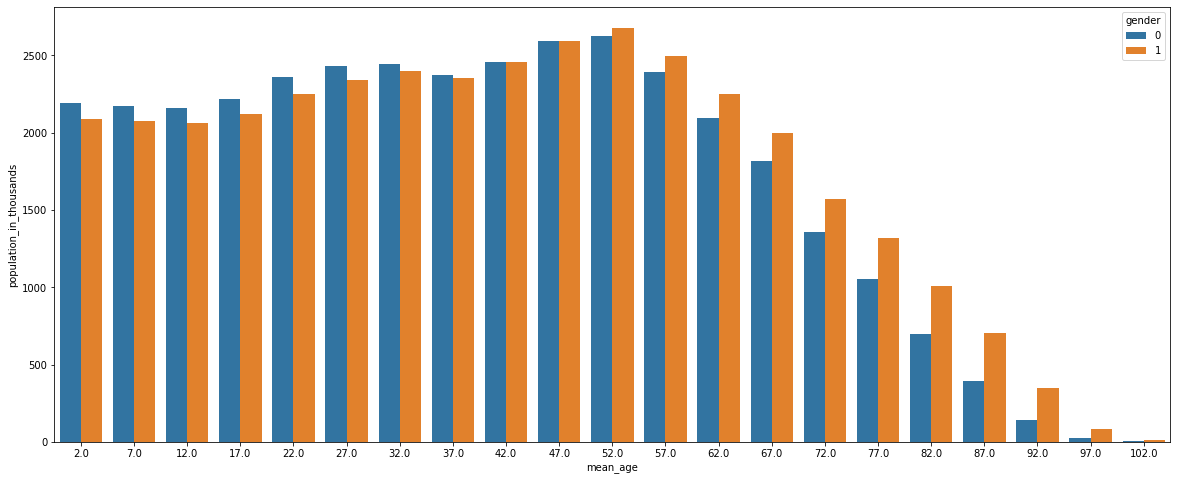

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='mean_age',y='population_in_thousands',hue='gender',data=age_gen_df,ci=None)

Here 0 is male and 1 is female

OBSERVATIONS:  
--Largest group of people are traveling at the age >45 and < 60 age.  
-- We can observe after 50 age population bucket gradually decreased  
-- We can see upto 57 age Male population is more than Female but later female population is more than male as age increased.  
-- We can observe Women lived longer than Men


**Population count in each country**

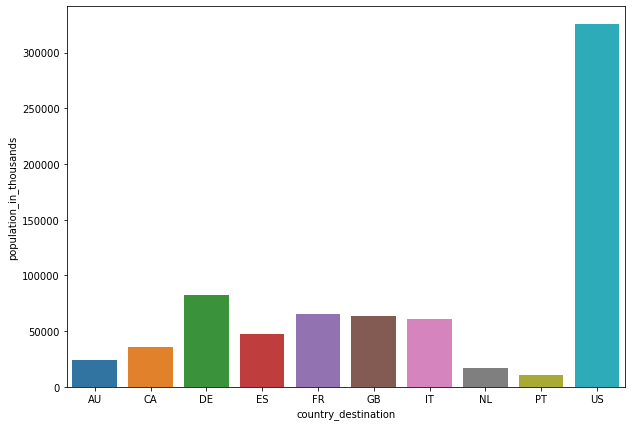

In [ ]:

plt.figure(figsize=(10,7))
pop=age_gen_df.groupby('country_destination')['population_in_thousands'].sum()
sns.barplot(x=pop.index,y=pop,ci=None)

Distance of destination country from USA(Origin)

In [ ]:
countries


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


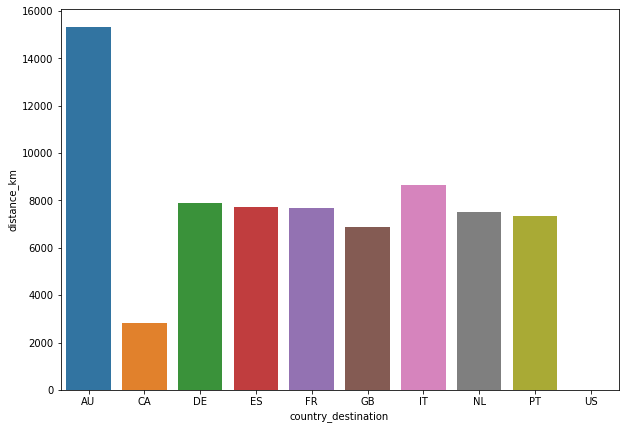

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='country_destination',y='distance_km',data=countries)

Let us now check if there is any effect of destination country distance on frequency of booking. For this let us use Scatter Plot.

**CORRELATION**  
Relation between two variables is termed as correlation in statistics, i.e., how much presence of a variable effects the other.This correlation generally ranges from -1 to 1, deciding whether it’s positive or not.  
On the other hand, in simpler words, Correlation is:  
**Positive**: when the values increase together.  
Negative: when one value decreases as the other increases.

In [ ]:
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134892,u9wbgp70s4,2013-12-24,20131224010144,NaN,NaN,NaN,basic,0.0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
134893,wqmesli72k,2013-12-24,20131224011025,2014-02-17,MALE,44.0,basic,23.0,en,direct,direct,untracked,Android,Other/Unknown,NaN,US
134894,awo1jlutax,2013-12-24,20131224011106,NaN,MALE,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
134895,7nkdwxj97m,2013-12-24,20131224011403,NaN,MALE,43.0,facebook,12.0,en,api,other,untracked,iOS,iPhone,NaN,NDF


In [ ]:
country_count=train_users[(train_users['country_destination']!='NDF') & (train_users['country_destination']!='other')]['country_destination'].value_counts()
country_count

US    41380
FR     3529
IT     1821
GB     1569
ES     1521
CA      971
DE      803
NL      508
AU      379
PT      132
Name: country_destination, dtype: int64

In [ ]:
countries[{'country_destination','distance_km'}]

,distance_km,country_destination
0,15297.7440,AU
1,2828.1333,CA
2,7879.5680,DE
3,7730.7240,ES
4,7682.9450,FR
5,6883.6590,GB
6,8636.6310,IT
7,7524.3203,NL
8,7355.2534,PT
9,0.0000,US


converting it to series as countries count is also in series 

In [ ]:
con_dist=pd.Series(countries['distance_km'])
con_dist.index=countries['country_destination']
con_dist

country_destination
AU    15297.7440
CA     2828.1333
DE     7879.5680
ES     7730.7240
FR     7682.9450
GB     6883.6590
IT     8636.6310
NL     7524.3203
PT     7355.2534
US        0.0000
Name: distance_km, dtype: float64

In [ ]:
df_dist_count = pd.concat([country_count,con_dist],axis=1)

In [ ]:
df_dist_count

,country_destination,distance_km
US,41380,0.0000
FR,3529,7682.9450
IT,1821,8636.6310
GB,1569,6883.6590
ES,1521,7730.7240
CA,971,2828.1333
DE,803,7879.5680
NL,508,7524.3203
AU,379,15297.7440
PT,132,7355.2534


In [ ]:
df_dist_count.columns=['booking_count','distance_km']

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


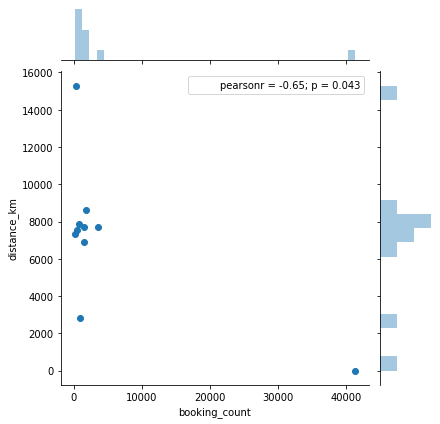

In [ ]:
sns.jointplot(x='booking_count',y='distance_km',data=df_dist_count,stat_func=stat.pearsonr)

There is a strong **negative correlation of -0.65**. People overwhelmingly prefer booking in the United States than any other country in the world. We can attribute this preference to distance. Let us check if this holds true for just the interantional countries as well.



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


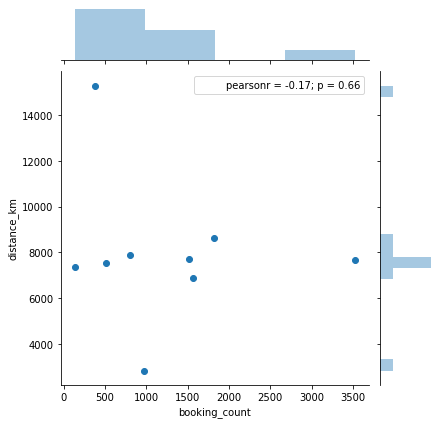

In [ ]:
sns.jointplot(x='booking_count',y='distance_km',data=df_dist_count.drop('US'),stat_func=stat.pearsonr)

 **SOME MORE STATISTICS**

let us plot the distribution of the amount of time users spent in each session.

In [ ]:
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
203677,pn1o59adr2,show,NaN,NaN,Windows Desktop,72.0
203678,pn1o59adr2,index,view,view_search_results,Windows Desktop,25033.0
203679,pn1o59adr2,lookup,NaN,NaN,Windows Desktop,966.0
203680,pn1o59adr2,personalize,data,wishlist_content_update,Windows Desktop,7.0


In [ ]:
sessions.isna().any()

user_id           True
action            True
action_type       True
action_detail     True
device_type       True
secs_elapsed     False
dtype: bool

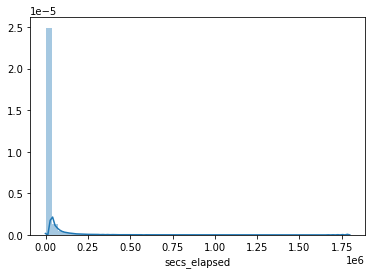

In [ ]:
sns.distplot(sessions['secs_elapsed'])

It seems that almost all sessions were less than 5000 seconds long. Let us look deeper into these sessions.


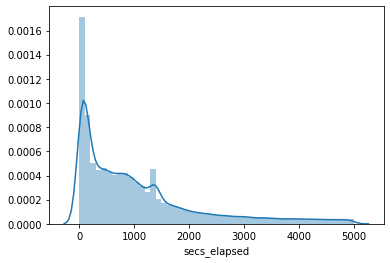

In [ ]:
sns.distplot(sessions[sessions['secs_elapsed']<5000]['secs_elapsed'])

As we can observe session time continuous droped after 1000secs. So lets see what percentage of people used less than 1000sec in total sessions

In [ ]:
len(sessions[sessions['secs_elapsed']<1000]['secs_elapsed'])/(len(sessions['secs_elapsed']))*100

41.61290639329936

46.72% of the total sessions are less than 1000secs long

Now let us construct a bar plot of all devices used by various users in interacting with the Airbnb Website and App.

In [ ]:
sessions['device_type'] = sessions['device_type'].replace('-unknown-', np.nan)

In [ ]:
sessions['device_type'].value_counts()

Mac Desktop                         90307
Windows Desktop                     55644
iPad Tablet                         20589
Android App Unknown Phone/Tablet    17538
iPhone                              12617
Chromebook                            940
Tablet                                812
Linux Desktop                         504
iPodtouch                             452
Android Phone                         268
Blackberry                              4
Windows Phone                           3
Name: device_type, dtype: int64

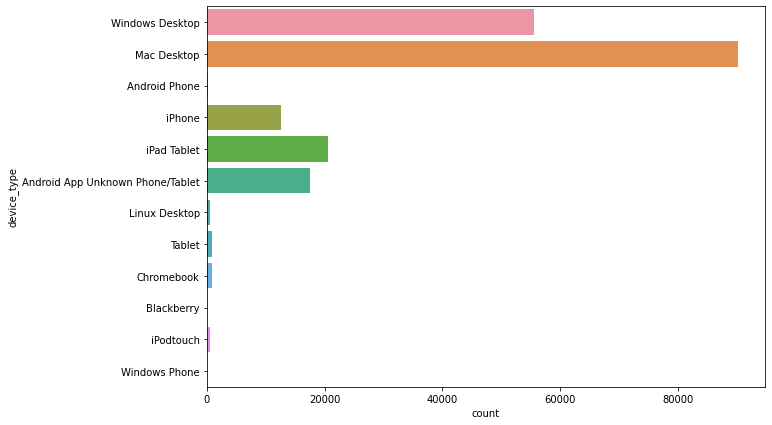

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y='device_type',data=sessions)

We can see that MAC Desktop us used more. Also we can observe all apple products are in top 5 used list i.e., most of the Airbnb users use apple products

**Training Users Statistics**

In [ ]:
train_users


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134892,u9wbgp70s4,2013-12-24,20131224010144,NaN,NaN,NaN,basic,0.0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
134893,wqmesli72k,2013-12-24,20131224011025,2014-02-17,MALE,44.0,basic,23.0,en,direct,direct,untracked,Android,Other/Unknown,NaN,US
134894,awo1jlutax,2013-12-24,20131224011106,NaN,MALE,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
134895,7nkdwxj97m,2013-12-24,20131224011403,NaN,MALE,43.0,facebook,12.0,en,api,other,untracked,iOS,iPhone,NaN,NDF


In [ ]:
country_share = train_users['country_destination'].value_counts()/train_users.shape[0]*100

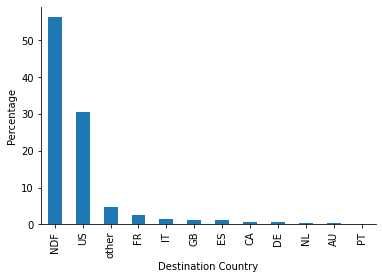

In [ ]:
country_share.plot(kind='bar')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

60% of the user never booked an Airbnb  
US is their first destination

**Session Features**

Feature 1-Number of devices : If the user uses a lot of devices, it implies s/he travels very often and hence, would be likely to book an Airbnb  

Feature 2 -- number of seconds : total number of seconds the user has spent on Airbnb Sessions  

Feature 3 -- Average sessions per second   

Feature 4 -- Total number of sessions  and number of session types  

Feature 5 -- Number of short sessions and long sessions

In [ ]:
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134892,u9wbgp70s4,2013-12-24,20131224010144,NaN,NaN,NaN,basic,0.0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
134893,wqmesli72k,2013-12-24,20131224011025,2014-02-17,MALE,44.0,basic,23.0,en,direct,direct,untracked,Android,Other/Unknown,NaN,US
134894,awo1jlutax,2013-12-24,20131224011106,NaN,MALE,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
134895,7nkdwxj97m,2013-12-24,20131224011403,NaN,MALE,43.0,facebook,12.0,en,api,other,untracked,iOS,iPhone,NaN,NDF


In [ ]:
total_seconds = sessions.groupby('user_id')['secs_elapsed'].sum()

In [ ]:
number_of_devices = sessions.groupby('user_id')['device_type'].nunique()

In [ ]:
avg_seconds = sessions.groupby('user_id')['secs_elapsed'].mean()

In [ ]:
total_sessions = sessions.groupby('user_id')['action'].count()

In [ ]:
distinct_sessions = sessions.groupby('user_id')['action'].nunique()

In [ ]:
num_short_sessions = sessions[sessions['secs_elapsed'] <= 300].groupby('user_id')['action'].count()
num_long_sessions = sessions[sessions['secs_elapsed'] >= 2000].groupby('user_id')['action'].count()

In [ ]:
def session_features(df):
  df['total_seconds']=df['id'].apply(lambda x:total_seconds[x] if x in total_seconds else 0)
  df['num_devices']=df['id'].apply(lambda x:number_of_devices[x] if x in number_of_devices else 0)
  df['avg_seconds']=df['id'].apply(lambda x:avg_seconds[x] if x in avg_seconds else 0)
  df['total_sessions']=df['id'].apply(lambda x:total_sessions[x] if x in total_sessions else 0)
  df['distinct_sessions']=df['id'].apply(lambda x:distinct_sessions[x] if x in distinct_sessions else 0)
  df['num_short_sessions']=df['id'].apply(lambda x:num_short_sessions[x] if x in num_short_sessions else 0)
  df['num_long_sessions']=df['id'].apply(lambda x:num_long_sessions[x] if x in num_long_sessions else 0)
  return df

In [ ]:
df_trains = session_features(train_users)
df_trains

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,total_seconds,num_devices,avg_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134892,u9wbgp70s4,2013-12-24,20131224010144,NaN,NaN,NaN,basic,0.0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF,0,0,0,0,0,0,0
134893,wqmesli72k,2013-12-24,20131224011025,2014-02-17,MALE,44.0,basic,23.0,en,direct,direct,untracked,Android,Other/Unknown,NaN,US,0,0,0,0,0,0,0
134894,awo1jlutax,2013-12-24,20131224011106,NaN,MALE,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,0,0,0,0,0,0,0
134895,7nkdwxj97m,2013-12-24,20131224011403,NaN,MALE,43.0,facebook,12.0,en,api,other,untracked,iOS,iPhone,NaN,NDF,0,0,0,0,0,0,0


In [ ]:
def set_age_group(x):
    if x < 40:
        return 'Young'
    elif x >=40 and x < 60:
        return 'Middle'
    elif x >= 60 and x <= 125:
        return 'Old'
    else:
        return 'Unknown'

In [ ]:
df_trains['age_group'] = df_trains['age'].apply(set_age_group)

Since we already have our age groups, we can drop the age feature.

In [ ]:
df_trains=df_trains.drop('age',axis=1)

Let us do some feature engineering on browsers

In [ ]:
def browsers(df):
    df['first_browser'] = df['first_browser'].apply(lambda x: "Mobile_Safari" if x == "Mobile Safari" else x)
    major_browsers = ['Chrome', 'Safari', 'Firefox', 'IE', 'Mobile_Safari']
    df['first_browser'] = df['first_browser'].apply(lambda x: 'Other' if x not in major_browsers else x)
    return df

In [ ]:
df_trains=browsers(df_trains)

Feature engineering on devices

In [ ]:
train_users['first_device_type'].unique()

array(['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)', nan], dtype=object)

In [ ]:
# def classify_device(x):
#     if x.find('Desktop') != -1:
#         return 'Desktop'
#     elif x.find('Tablet') != -1 or x.find('iPad') != -1:
#         return 'Tablet'
#     elif x.find('Phone') != -1:
#         return 'Phone'
#     else:
#         return 'Unknown'

In [ ]:
# def devices(df):
#     df['first_device_type'] = df['first_device_type'].apply(classify_device)
#     return df

In [ ]:
#devices(df_trains)

We will drop the first_bookings and the timsestamp features. This is because they do not add any value when finally testing the model with the test set. All our test users have NaNs as first booking and the timestamp is of no significance.

In [ ]:
df_trains = df_trains.drop('timestamp_first_active', axis=1)

Finally we will drop the accounts created feature as our training and test sets were separated in the middle of 2014. As a result, all test users registered only in 2014.

In [ ]:
df_trains = df_trains.drop('date_account_created', axis=1)

Dropping date first booked

In [ ]:
df_trains = df_trains.drop('date_first_booking', axis=1)

In [ ]:
df_trains = df_trains.set_index('id')

changing NAN values to unknown in gender column

In [ ]:
df_trains['gender'] = df_trains['gender'].fillna('Unknown')

In [ ]:
df_trains

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,total_seconds,num_devices,avg_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,age_group
id,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,Unknown,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,0,0,0,0,0,0,Unknown
820tgsjxq7,MALE,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,0,0,0,0,0,0,0,Young
4ft3gnwmtx,FEMALE,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US,0,0,0,0,0,0,0,Middle
bjjt8pjhuk,FEMALE,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,0,0,0,0,0,0,0,Middle
87mebub9p4,Unknown,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,0,0,0,0,0,0,0,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u9wbgp70s4,Unknown,basic,0.0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF,0,0,0,0,0,0,0,Unknown
wqmesli72k,MALE,basic,23.0,en,direct,direct,untracked,Android,Other/Unknown,Other,US,0,0,0,0,0,0,0,Middle
awo1jlutax,MALE,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,0,0,0,0,0,0,0,Middle


Let us now start testing our training data on testing data. lets saperate X and y data

In [ ]:
class_dict = {
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11
}

In [ ]:
df_trains

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,total_seconds,num_devices,avg_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,age_group
id,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,Unknown,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,0,0,0,0,0,0,Unknown
820tgsjxq7,MALE,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,0,0,0,0,0,0,0,Young
4ft3gnwmtx,FEMALE,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US,0,0,0,0,0,0,0,Middle
bjjt8pjhuk,FEMALE,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,0,0,0,0,0,0,0,Middle
87mebub9p4,Unknown,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,0,0,0,0,0,0,0,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u9wbgp70s4,Unknown,basic,0.0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF,0,0,0,0,0,0,0,Unknown
wqmesli72k,MALE,basic,23.0,en,direct,direct,untracked,Android,Other/Unknown,Other,US,0,0,0,0,0,0,0,Middle
awo1jlutax,MALE,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,0,0,0,0,0,0,0,Middle


Below ID has country destination as NAN so deleting it from our data

In [ ]:
train_users[train_users['id']=='jsb7d3vzn5']
train_users[train_users['id']=='bliaotz6zn']


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,total_seconds,num_devices,avg_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,age_group
134896,bliaotz6zn,2013-12-24,20131224011803,NaN,-unk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,Unknown


Dropping it from df_trains

In [ ]:
df_trains=df_trains.drop('bliaotz6zn')

In [ ]:
X, y = df_trains.drop('country_destination', axis=1), df_trains['country_destination'].apply(lambda x: class_dict[x])

In [ ]:
X = pd.get_dummies(X, prefix='is')

In [ ]:
def feature_engineering(df):
    df = session_features(df)
    df = df.drop('age', axis=1)
    df = browsers(df)
    df = df.drop('timestamp_first_active', axis=1)
    df= df.drop('date_first_booking', axis=1)
    df=df.drop('date_account_created', axis=1)
    df = df.set_index('id')
    df = pd.get_dummies(df, prefix='is')
    return df

In [ ]:
X

,signup_flow,total_seconds,num_devices,avg_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,is_FEMALE,is_MALE,is_OTHER,is_Unknown,is_basic,is_facebook,is_ca,is_cs,is_da,is_de,is_el,is_en,is_es,is_fi,is_fr,is_hr,is_hu,is_id,is_is,is_it,is_ja,is_ko,is_nl,is_no,is_pl,is_pt,is_ru,is_sv,is_th,is_tr,is_zh,is_api,...,is_google,is_gsp,is_meetup,is_naver,is_other,is_padmapper,is_vast,is_wayn,is_yahoo,is_yandex,is_linked,is_local ops,is_marketing,is_omg,is_product,is_tracked-other,is_untracked,is_Android,is_Moweb,is_Web,is_iOS,is_Android Phone,is_Android Tablet,is_Desktop (Other),is_Mac Desktop,is_Other/Unknown,is_SmartPhone (Other),is_Windows Desktop,is_iPad,is_iPhone,is_Chrome,is_Firefox,is_IE,is_Mobile_Safari,is_Other,is_Safari,is_Middle,is_Old,is_Unknown,is_Young
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
820tgsjxq7,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4ft3gnwmtx,3.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
bjjt8pjhuk,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
87mebub9p4,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imralqcisd,25.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
u9wbgp70s4,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
wqmesli72k,23.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, stratify=y)

**MachineLearning**

 We will train our model using three classifiers: Gradient Boosting, Logistic Regression and Random Forest and choose the one with the best accuracy.

In [ ]:
classifiers = [RandomForestClassifier(verbose=1), LogisticRegression(verbose=1), GradientBoostingClassifier(verbose=True)]

for classifier in classifiers:
    classifier.fit(train_X, train_y)
    print("Score: " + str(classifier.score(test_X, test_y)))

Let us select Gradient Boosting Classifier and try to improve its performance by hyper tuning its parameters 

Hyperparameter Tuning using Grid Search Cross Validation

In [ ]:
parameters = {
    'n_estimators': [100,200],
    'max_features': ['auto', 'log2'],
    'max_depth': [3,5]
}

In [ ]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters, verbose=100)
clf.fit(train_X, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV]  max_depth=3, max_features=auto, n_estimators=100, score=0.582, total= 4.0min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV]  max_depth=3, max_features=auto, n_estimators=100, score=0.588, total= 3.9min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.9min remaining:    0.0s
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV]  max_depth=3, max_features=auto, n_estimators=100, score=0.596, total= 3.9min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.7min remaining:    0.0s
[CV] max_depth=3, max_features=auto, n_estimators=100 ................
[CV]  max_depth=3, max_features=auto, n_estimators=100, score=0.589, total= 3.9min
[Pa

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [ ]:
clf.best_params_

{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}

In [ ]:
clf.cv_results_['mean_test_score']

array([0.58855974, 0.58930106, 0.5854758 , 0.58703752, 0.58798643,
       0.58672122, 0.58820389, 0.58785793])

**Testing**  
Now, that we have a classifier that has been tuned for best results, we can proceed to make predictions for our test users and build the final submission file.

In [ ]:
def set_age_group(x):
    if x < 40:
        return 'Young'
    elif x >=40 and x < 60:
        return 'Middle'
    elif x >= 60 and x <= 125:
        return 'Old'
    else:
        return 'Unknown'

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/Data/airbnb/test_users.csv')
df_test['gender'] = df_test['gender'].replace('-unknown-', 'Unknown')
df_test['age_group'] = df_test['age'].apply(set_age_group)
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age_group
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,Young
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,Unknown,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,Unknown
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,Unknown,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,Unknown
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,Unknown,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,Unknown
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,Unknown,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,Unknown


In [ ]:
df_test = feature_engineering(df_test)
df_test = df_test.drop('is_weibo', axis=1)

In [ ]:
df_test

,signup_flow,total_seconds,num_devices,avg_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,is_FEMALE,is_MALE,is_OTHER,is_Unknown,is_basic,is_facebook,is_google,is_-unknown-,is_ca,is_cs,is_da,is_de,is_el,is_en,is_es,is_fi,is_fr,is_hu,is_id,is_it,is_ja,is_ko,is_nl,is_no,is_pl,is_pt,is_ru,is_sv,is_th,is_tr,is_zh,is_content,...,is_facebook-open-graph,is_google,is_gsp,is_meetup,is_naver,is_other,is_padmapper,is_vast,is_yahoo,is_yandex,is_linked,is_local ops,is_marketing,is_omg,is_product,is_tracked-other,is_untracked,is_Android,is_Moweb,is_Web,is_iOS,is_Android Phone,is_Android Tablet,is_Desktop (Other),is_Mac Desktop,is_Other/Unknown,is_SmartPhone (Other),is_Windows Desktop,is_iPad,is_iPhone,is_Chrome,is_Firefox,is_IE,is_Mobile_Safari,is_Other,is_Safari,is_Middle,is_Old,is_Unknown,is_Young
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5uwns89zht,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
jtl0dijy2j,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
xx0ulgorjt,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
6c6puo6ix0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
czqhjk3yfe,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
zp8xfonng8,23,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
fa6260ziny,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_test.columns.symmetric_difference(X.columns)

Index(['is_-unknown-', 'is_daum'], dtype='object')

THere is miss match in the features of model and input . lets drop them as they are of no significance

In [ ]:
df_test.columns

Index(['signup_flow', 'total_seconds', 'num_devices', 'avg_seconds',
       'total_sessions', 'distinct_sessions', 'num_short_sessions',
       'num_long_sessions', 'is_FEMALE', 'is_MALE', 'is_OTHER', 'is_Unknown',
       'is_basic', 'is_facebook', 'is_google', 'is_ca', 'is_cs', 'is_da',
       'is_de', 'is_el', 'is_en', 'is_es', 'is_fi', 'is_fr', 'is_hu', 'is_id',
       'is_it', 'is_ja', 'is_ko', 'is_nl', 'is_no', 'is_pl', 'is_pt', 'is_ru',
       'is_sv', 'is_th', 'is_tr', 'is_zh', 'is_content', 'is_direct',
       'is_other', 'is_remarketing', 'is_sem-brand', 'is_sem-non-brand',
       'is_seo', 'is_baidu', 'is_bing', 'is_craigslist', 'is_direct',
       'is_email-marketing', 'is_facebook', 'is_facebook-open-graph',
       'is_google', 'is_gsp', 'is_meetup', 'is_naver', 'is_other',
       'is_padmapper', 'is_vast', 'is_yahoo', 'is_yandex', 'is_linked',
       'is_local ops', 'is_marketing', 'is_omg', 'is_product',
       'is_tracked-other', 'is_untracked', 'is_Android', 'is_Moweb',

In [ ]:
X.columns

Index(['signup_flow', 'total_seconds', 'num_devices', 'avg_seconds',
       'total_sessions', 'distinct_sessions', 'num_short_sessions',
       'num_long_sessions', 'is_FEMALE', 'is_MALE', 'is_OTHER', 'is_Unknown',
       'is_basic', 'is_facebook', 'is_ca', 'is_cs', 'is_da', 'is_de', 'is_el',
       'is_en', 'is_es', 'is_fi', 'is_fr', 'is_hu', 'is_id', 'is_it', 'is_ja',
       'is_ko', 'is_nl', 'is_no', 'is_pl', 'is_pt', 'is_ru', 'is_sv', 'is_th',
       'is_tr', 'is_zh', 'is_content', 'is_direct', 'is_other',
       'is_remarketing', 'is_sem-brand', 'is_sem-non-brand', 'is_seo',
       'is_baidu', 'is_bing', 'is_craigslist', 'is_direct',
       'is_email-marketing', 'is_facebook', 'is_facebook-open-graph',
       'is_google', 'is_gsp', 'is_meetup', 'is_naver', 'is_other',
       'is_padmapper', 'is_vast', 'is_yahoo', 'is_yandex', 'is_linked',
       'is_local ops', 'is_marketing', 'is_omg', 'is_product',
       'is_tracked-other', 'is_untracked', 'is_Android', 'is_Moweb', 'is_Web',
  

In [ ]:
df_test=df_test.drop({'is_-unknown-','is_daum'},axis=1)

In [ ]:
X=X.drop({'is_hr', 'is_api', 'is_wayn','is_is'},axis=1)

KeyError: ignored

In [ ]:
df_test=df_test.drop('is_google',axis=1)

In [ ]:
X=X.drop('is_google',axis=1)

In [ ]:
print('length of df_test columns:',len(df_test.columns))
print('length of X columns:',len(X.columns))

length of df_test columns: 89
length of X columns: 89


In [ ]:
df_test2=df_test.copy()

In [ ]:
pred_prob = clf.predict_proba(df_test2)

ValueError: ignored

In [ ]:
pred_prob = pd.DataFrame(pred_prob, index=df_test.index)
pred_prob.head()

In [ ]:
inv_classes = {v: k for k, v in class_dict.items()}
inv_classes

In [ ]:
def get_top(s):
    indexes = [i for i in range(0,12)]
    lst = list(zip(indexes, s))
    top_five = sorted(lst, key=lambda x: x[1], reverse=True)[:5]
    top_five = [inv_classes[i[0]] for i in top_five]
    return str(top_five)

In [ ]:
pred_prob['get_top'] = pred_prob.apply(get_top, axis=1)
pred_prob.head()

In [ ]:
import ast
pred_prob['get_top'] = pred_prob['get_top'].apply(lambda x: ast.literal_eval(x))

In [ ]:
s = pred_prob.apply(lambda x: pd.Series(x['get_top']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'country'

In [ ]:
submission = pred_prob.drop([i for i in range(0,12)] + ['get_top'], axis=1).join(s)
submission.head()